In [1]:
import os

In [2]:
import pyiron_base
pyiron_base.__file__

'/srv/conda/envs/notebook/lib/python3.12/site-packages/pyiron_base/__init__.py'

In [3]:
from pyiron_base import Project
from pyiron_base.project.delayed import draw

In [4]:
pr = Project("test")

In [5]:
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

In [6]:
def write_input(working_directory, input_dict):
    for k, v in input_dict.items():
        with open(os.path.join(working_directory, k + ".txt"), "w") as f:
            f.writelines(str(v))

In [7]:
def collect_output(working_directory):
    with open(os.path.join(working_directory, "result.txt"), "r") as f:
        return {"result": int(f.readlines()[0])}

In [8]:
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

In [9]:
z = pr.wrap_executable(
    job_name="job_xy",
    executable_str="x=$(cat x.txt); y=$(cat y.txt); echo $(($x + $y)) > result.txt",
    write_input_funct=write_input,
    collect_output_funct=collect_output,
    input_dict={"x": 1, "y": 2},
    conda_environment_path=None,
    conda_environment_name=None,
    input_file_lst=None,
    delayed=True,
    output_file_lst=["result.txt"],
    output_key_lst=["result"],
)

In [10]:
w = pr.wrap_executable(
    job_name="job_xyz",
    executable_str="x=$(cat x.txt); y=$(cat y.txt); z=$(cat result.txt); echo $(($x + $y + $z)) > result.txt",
    write_input_funct=write_input,
    collect_output_funct=collect_output,
    input_dict={"x": 1, "y": z.output.result},
    conda_environment_path=None,
    conda_environment_name=None,
    input_file_lst=[z.files.result_txt],
    delayed=True,
    output_file_lst=["result.txt"],
    output_key_lst=["result"],
)

In [11]:
w.output.result.result()

The job job_xy was saved and received the ID: 1
The job job_xyz was saved and received the ID: 2


7

In [12]:
nodes_dict, edges_lst = w.get_graph()
nodes_dict, edges_lst

({'pyiron_base.project.delayed.DelayedObject0x7fc25be9ecf0>': <pyiron_base.project.delayed.DelayedObject at 0x7fc25be9ecf0>,
  'project_7be6cab4826cfd7ade47b87cdaea3371': {'groups': [], 'nodes': ['job_xy', 'job_xyz']},
  'input_internal_dict': {'x': 1,
   'y': <pyiron_base.project.delayed.DelayedObject at 0x7fc25be9ee10>},
  'x_1d847da32ecaabf6731c38f798c3d4ce': 1,
  'pyiron_base.project.delayed.DelayedObject0x7fc25be9ee10>': <pyiron_base.project.delayed.DelayedObject at 0x7fc25be9ee10>,
  'input_internal_dict_945288f6129bcde5744a17d561d451c3': {'x': 1, 'y': 2},
  'executable_internal_str_15498766ba1a607aa8036005de1e79a2': 'x=$(cat x.txt); y=$(cat y.txt); echo $(($x + $y)) > result.txt',
  'internal_file_lst_8a76b3f1259a772a2ee2738c8264cf1f': None,
  'execute_job_bad787c53fa02a5559fe570238fdb23a': True,
  'executable_internal_str_2144f8fa3fd4c1ee128e458cd88d5e78': 'x=$(cat x.txt); y=$(cat y.txt); z=$(cat result.txt); echo $(($x + $y + $z)) > result.txt',
  'internal_file_lst': [<pyiron

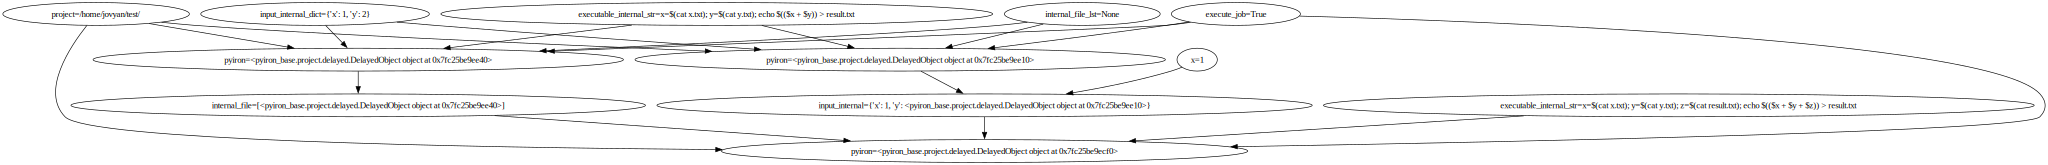

In [13]:
draw(node_dict=nodes_dict, edge_lst=edges_lst)